In [1]:
import chainladder as cl #harus untuk create venv -> updated version
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print("pandas: " +pd.__version__)
print("numpy: "+ np.__version__)
print("chainladder: "+cl.__version__)

pandas: 2.2.3
numpy: 2.2.5
chainladder: 0.8.24


>Load Data untuk mulai proses chainladder

Data terdiri dari tiga kolom yaitu :
1. Kolom Development yang berisi waktu valuasi
2. Kolom Origin yang berisi accident year
3. Kolom Values yang berisi rekaman spesifik accident date pada spesifik waktu valuasi seperti inccured losses, paid losses, atau jumlah klaim)

In [6]:
raa_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/raa.csv"
)
raa_df.head(20)

,development,origin,values
0,1981,1981,5012.0
1,1982,1982,106.0
2,1983,1983,3410.0
3,1984,1984,5655.0
4,1985,1985,1092.0
5,1986,1986,1513.0
6,1987,1987,557.0
7,1988,1988,1351.0
8,1989,1989,3133.0
9,1990,1990,2063.0


In [7]:
raa = cl.Triangle(
    raa_df,
    origin="origin",
    development="development",
    columns="values",
    cumulative=True,
)
raa

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [8]:
raa = cl.load_sample("raa")
raa

,12,24,36,48,60,72,84,96,108,120
1981,"5,012","8,269","10,907","11,805","13,539","16,181","18,009","18,608","18,662","18,834"
1982,106,"4,285","5,396","10,666","13,782","15,599","15,496","16,169","16,704",
1983,"3,410","8,992","13,873","16,141","18,735","22,214","22,863","23,466",,
1984,"5,655","11,555","15,766","21,266","23,425","26,083","27,067",,,
1985,"1,092","9,565","15,836","22,169","25,955","26,180",,,,
1986,"1,513","6,445","11,702","12,935","15,852",,,,,
1987,557,"4,020","10,946","12,314",,,,,,
1988,"1,351","6,947","13,112",,,,,,,
1989,"3,133","5,395",,,,,,,,
1990,"2,063",,,,,,,,,


In [9]:
raa.link_ratio

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1981,1.6498,1.3190,1.0823,1.1469,1.1951,1.1130,1.0333,1.0029,1.0092
1982,40.4245,1.2593,1.9766,1.2921,1.1318,0.9934,1.0434,1.0331,
1983,2.6370,1.5428,1.1635,1.1607,1.1857,1.0292,1.0264,,
1984,2.0433,1.3644,1.3489,1.1015,1.1135,1.0377,,,
1985,8.7592,1.6556,1.3999,1.1708,1.0087,,,,
1986,4.2597,1.8157,1.1054,1.2255,,,,,
1987,7.2172,2.7229,1.1250,,,,,,
1988,5.1421,1.8874,,,,,,,
1989,1.7220,,,,,,,,


Merupakan data dari link_ratio yang merupakan ratio yang mempresentasikan jumlah dari developments period

In [10]:
raa.latest_diagonal

,1990
1981,"18,834"
1982,"16,704"
1983,"23,466"
1984,"27,067"
1985,"26,180"
1986,"15,852"
1987,"12,314"
1988,"13,112"
1989,"5,395"
1990,"2,063"


In [11]:
raa.latest_diagonal / 1000

,1990
1981,18.83
1982,16.70
1983,23.47
1984,27.07
1985,26.18
1986,15.85
1987,12.31
1988,13.11
1989,5.39
1990,2.06


In [12]:
raa.valuation_date

Timestamp('1990-12-31 23:59:59.999999999')

Selanjutnya untuk interpretasi data yang ada dari triangle yang dibuat
1. is_cumulative : jika True maka data dari development periods adalah cumulative, jika tidak maka incremental
2. is_ultimate : jika True maka ultimate values sudah termasuk kedalam segitiga
3. is_val_tri : jika True maka development period yang menjadi acuan sebagai data valuasi aka berbalik dengan usia
3. is_full : jika True maka triangle yang dibuat adalah "squared"

In [13]:
print("apakah segitiga tersebut cumulative?", raa.is_cumulative)
print("apakah segitiga memuat ultimate projection?", raa.is_ultimate)
print("apakah sudah termasuk dengan segitiga valuasi?", raa.is_val_tri)
print("apakah segita sudah termasuk squared?", raa.is_full)

apakah segitiga tersebut cumulative? True
apakah segitiga memuat ultimate projection? False
apakah sudah termasuk dengan segitiga valuasi? False
apakah segita sudah termasuk squared? False


In [14]:
clrd_df = pd.read_csv(
    "https://raw.githubusercontent.com/casact/chainladder-python/master/chainladder/utils/data/clrd.csv"
)
clrd_df

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss,CumPaidLoss,BulkLoss,EarnedPremDIR,EarnedPremCeded,EarnedPremNet,Single,PostedReserve97,LOB
0,86,Allstate Ins Co Grp,1988,1988,1,367404,70571,127737,400699,5957,394742,0,281872,wkcomp
1,86,Allstate Ins Co Grp,1988,1989,2,362988,155905,60173,400699,5957,394742,0,281872,wkcomp
2,86,Allstate Ins Co Grp,1988,1990,3,347288,220744,27763,400699,5957,394742,0,281872,wkcomp
3,86,Allstate Ins Co Grp,1988,1991,4,330648,251595,15280,400699,5957,394742,0,281872,wkcomp
4,86,Allstate Ins Co Grp,1988,1992,5,354690,274156,27689,400699,5957,394742,0,281872,wkcomp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42840,44598,College Liability Ins Co Ltd RRG,1995,1996,2,343,249,82,397,0,397,1,630,othliab
42841,44598,College Liability Ins Co Ltd RRG,1995,1997,3,839,575,190,397,0,397,1,630,othliab
42842,44598,College Liability Ins Co Ltd RRG,1996,1996,1,125,6,98,257,0,257,1,630,othliab
42843,44598,College Liability Ins Co Ltd RRG,1996,1997,2,95,17,28,257,0,257,1,630,othliab


In [15]:
clrd = cl.Triangle(
    clrd_df,
    origin="AccidentYear",
    development="DevelopmentYear",
    columns=[
        "IncurLoss",
        "CumPaidLoss",
        "BulkLoss",
        "EarnedPremDIR",
        "EarnedPremCeded",
        "EarnedPremNet",
    ],
    index=["GRNAME", "LOB"],
    cumulative=True,
)
clrd

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(775, 6, 10, 10)"
Index:,"[GRNAME, LOB]"
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In [17]:
clrd.index.head()

,GRNAME,LOB
0,Adriatic Ins Co,othliab
1,Adriatic Ins Co,ppauto
2,Aegis Grp,comauto
3,Aegis Grp,othliab
4,Aegis Grp,ppauto


In [19]:
print("Struktur Data dari clrd: ", type(clrd.values))
print("Jumlah total nilai data: ", np.nansum(clrd.values))

Struktur Data dari clrd:  <class 'numpy.ndarray'>
Jumlah total nilai data:  3661713596.0


# Advance Triangle Manipulation
1. Menggunakan untuk virtual kolom
2. Menggunakan grouby untuk melakukan fungsinya
3. Melakukan sorting dengan menggunakan loc dari data inccured

In [2]:
import chainladder as cl

In [8]:
clrd = cl.load_sample('clrd')
clrd = clrd[clrd['LOB']=='comauto']

clrd['LossRatio'] = lambda clrd: clrd['IncurLoss'] / clrd['EarnedPremDIR']

top_10 = clrd['EarnedPremDIR'].groupby('GRNAME').sum().latest_diagonal
top_10 = top_10.loc[..., '1997', :].to_frame().nlargest(10)

clrd = clrd.groupby(clrd.index['GRNAME'].map(
    lambda x: x if x in top_10.index else 'Remainder')).sum()

clrd = clrd.loc[top_10.index.to_list() + ['Remainder']].iloc[::-1]
clrd

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(11, 7, 10, 10)"
Index:,[GRNAME]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet, LossRatio]"


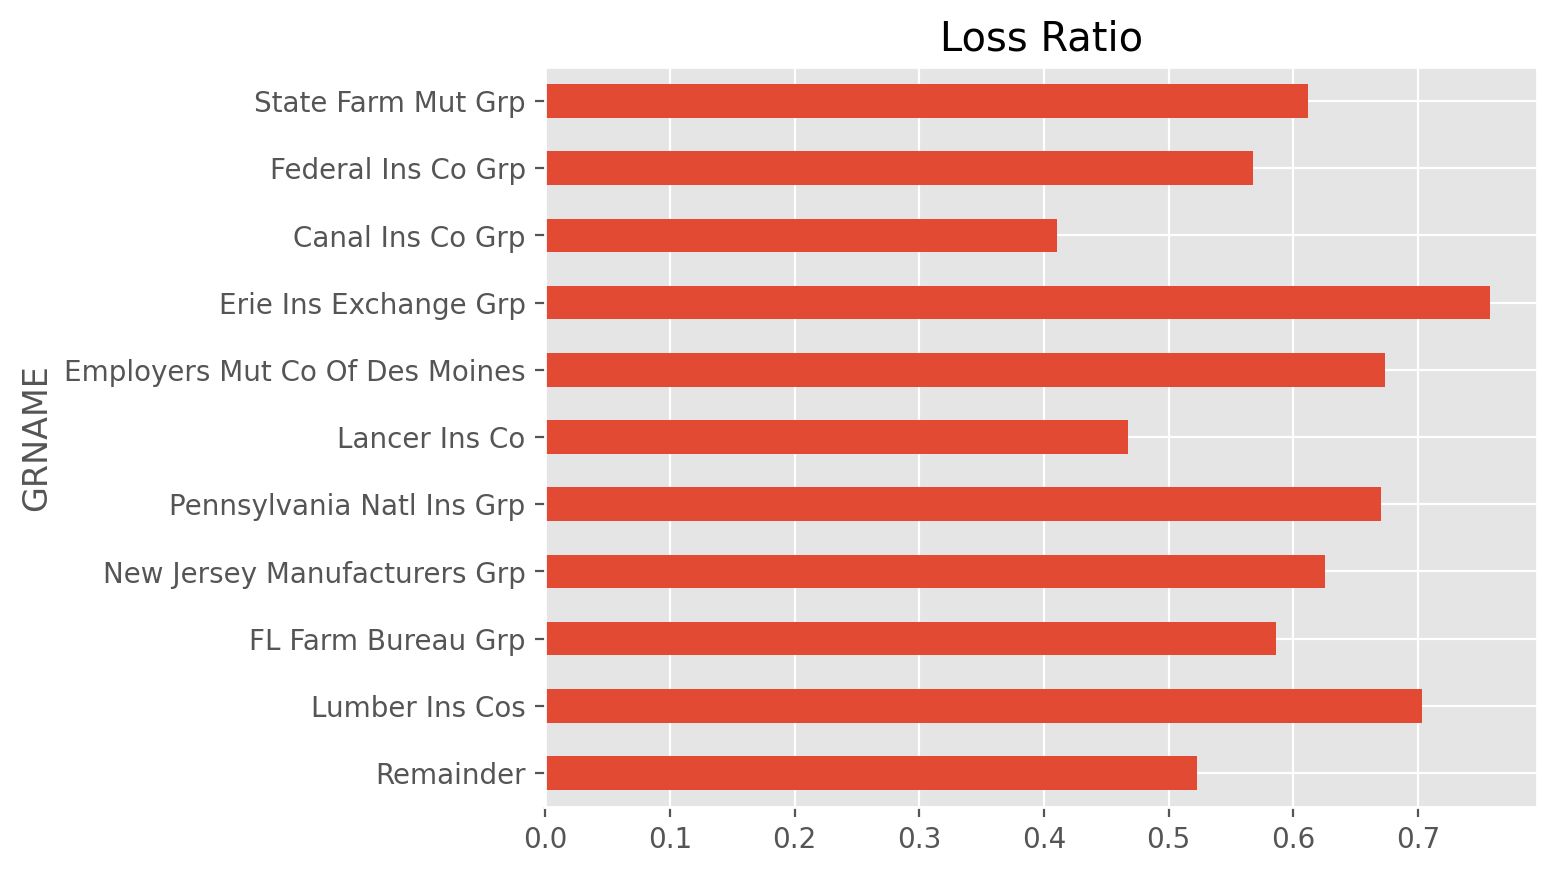

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

ax = clrd.latest_diagonal.sum('origin')['LossRatio'].plot(
    kind = 'barh', title = 'Loss Ratio');

In [15]:
tri_1997 = cl.load_sample('clrd')
tri_1997 = tri_1997.groupby('LOB').sum().loc['medmal']['CumPaidLoss']

# untuk mengubah triangle sebelum valuasi dan membentuk IBNR model yang baru
tri_1996 = tri_1997[tri_1997.valuation < '1997']
model_1996 = cl.Chainladder().fit(cl.TailCurve().fit_transform(tri_1996))

# slice untuk expected loss dari tahun 1997 ke periode model yang ingin dibangun -> perhatikan tahun valuasi yang ingin dibentuk
ave = model_1996.full_triangle_.dev_to_val()
ave = ave[ave.valuation==tri_1997.valuation_date].rename('columns', 'Expected')

# setelah itu baru bisa di compare sama expectation dan juga aktual nya, ini bisa under prediction atau over tergantung dari prediksinya
# perlu ada analisis lebih lanjut hasil dari ibnr dari valuasinya

ave['Actual'] = tri_1997.latest_diagonal[tri_1997.origin < '1997']
df = ave.to_frame().T.iloc[::-1]

df

,Expected,Actual
origin,,
1996,121827.081017,107474.0
1995,217810.877437,209222.0
1994,257705.213333,252449.0
1993,272310.606396,276235.0
1992,268464.039254,267007.0
1991,278465.103375,275923.0
1990,233124.783030,235717.0
1989,225714.544539,222707.0
1988,215441.350892,217239.0


Text(0, 0.5, 'Origin')

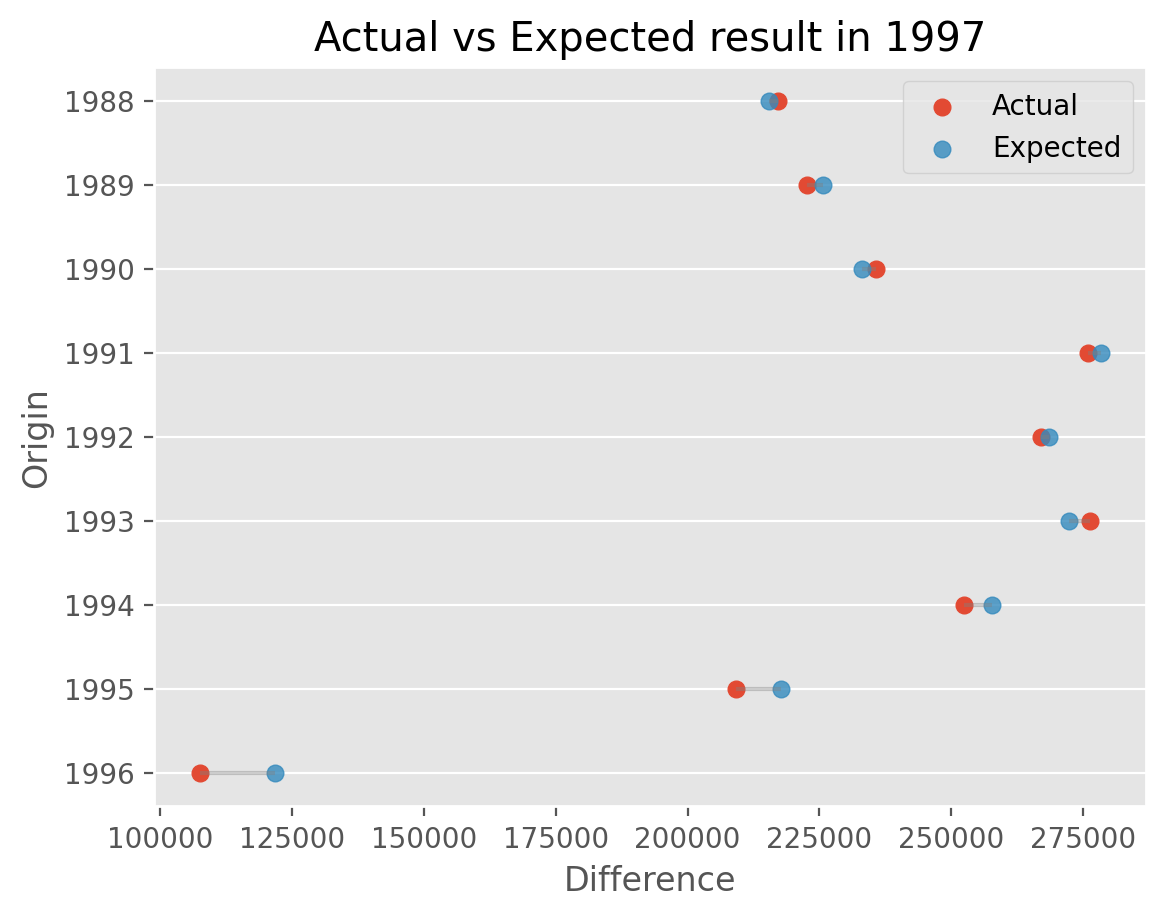

In [18]:
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.grid(axis='x')
plt.hlines(
    y = df.index.astype(str),
    xmin = df['Actual'],
    xmax = df['Expected'],
    color = 'grey', alpha = 0.4
)

plt.scatter(df['Actual'], df.index.astype(str), alpha=1, label = 'Actual')
plt.scatter(df['Expected'], df.index.astype(str), alpha=0.8 , label = 'Expected')
plt.legend()
plt.title("Actual vs Expected result in 1997")
plt.xlabel('Difference')
plt.ylabel('Origin')

catatan :
1. jika data masih immature atau volatile bisa melakukan pendekatan dengan BF (low n_iters)
2. jika data masih credible dan konsisten maka bisa melakukan pendekatan CL (high n_iters)

In [23]:
clrd = cl.load_sample('clrd').groupby('LOB').sum()
X = clrd.loc['medmal', 'CumPaidLoss']
sample_weight = clrd.loc['medmal', 'EarnedPremDIR'].latest_diagonal

grid = cl.GridSearch(
    estimator=cl.Pipeline(steps=[
        ('dev', cl.Development()),
        ('tail', cl.TailCurve()),
        ('model', cl.Benktander())]),
    param_grid= dict(
        model__n_iters = list(range(1, 100, 2)),
        model__apriori = [0.50, 0.75, 1.00]),
    scoring = {'IBNR' : lambda x: x.named_steps.model.ibnr_.sum()},
    n_jobs=-1
    )

from sklearn import set_config
set_config(display='diagram')
grid

GridSearch(estimator=Pipeline(steps=[('dev', Development()),
                                     ('tail', TailCurve()),
                                     ('model', Benktander())]),
           n_jobs=-1,
           param_grid={'model__apriori': [0.5, 0.75, 1.0],
                       'model__n_iters': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39,
                                          41, 43, 45, 47, 49, 51, 53, 55, 57,
                                          59, ...]},
           scoring={'IBNR': <function <lambda> at 0x000002727054B880>})

In [24]:
# dilakukan fitting untuk model dengan menggunakan param_grid dan option untuk agregat yang dari IBNR dengan model scoring
grid.fit(X, sample_weight = sample_weight)

output = grid.results_.pivot(
    index='model__n_iters',
    columns='model__apriori',
    values='IBNR')
output.head()

model__apriori,0.50,0.75,1.00
model__n_iters,,,
1,8.326572e+05,1.248986e+06,1.665314e+06
3,1.075446e+06,1.289296e+06,1.503147e+06
5,1.150192e+06,1.308018e+06,1.465843e+06
7,1.189016e+06,1.318141e+06,1.447267e+06
9,1.214161e+06,1.324979e+06,1.435798e+06


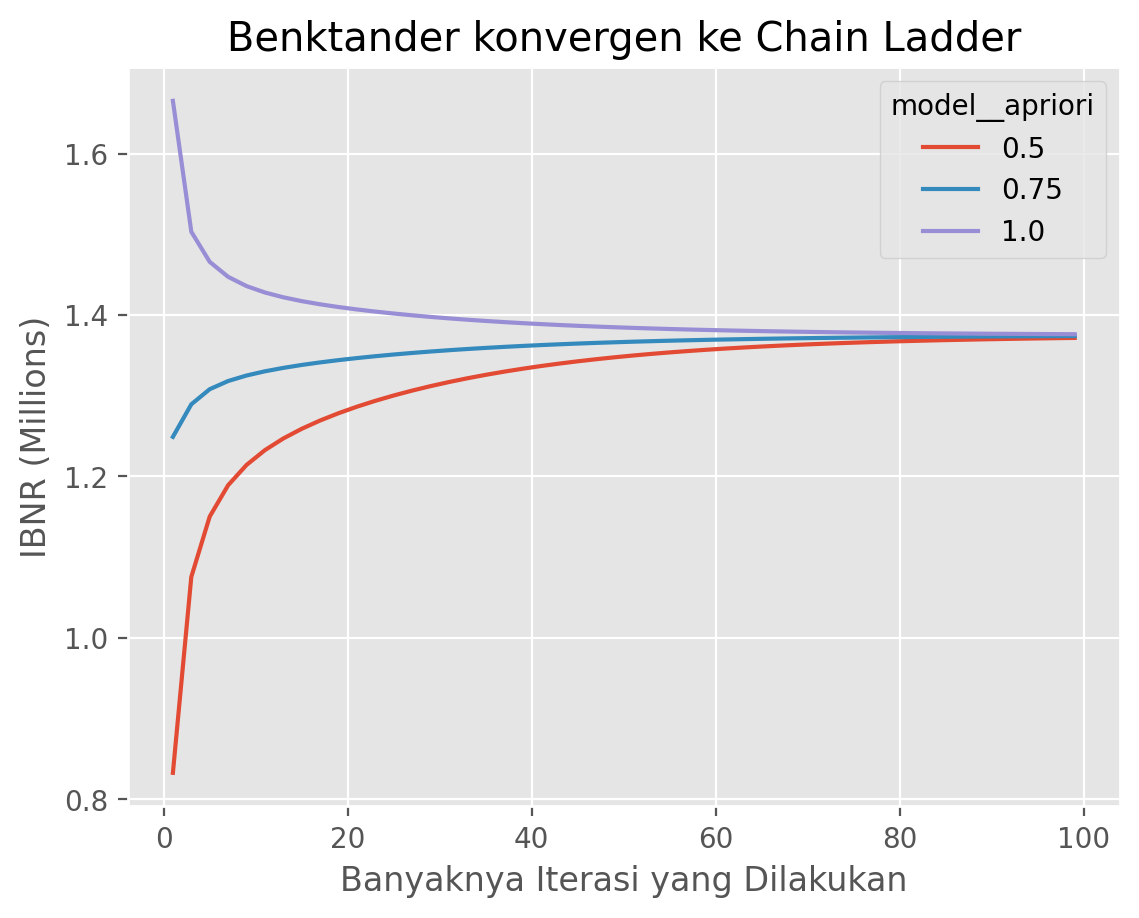

In [25]:
# cek kembali dengan menggunakan visualisasi data yang ada dengan menggunakan benktander atau datanya diambil dari prior
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'

ax = (output/1e6).plot(
    ylabel= 'IBNR (Millions)',
    xlabel= 'Banyaknya Iterasi yang Dilakukan',
    title='Benktander konvergen ke Chain Ladder');